In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
# from tqdm import tqdm
from tqdm.notebook import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0,
                                                          n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

# print(type(X_train), type(y_train))
# len(X_train)

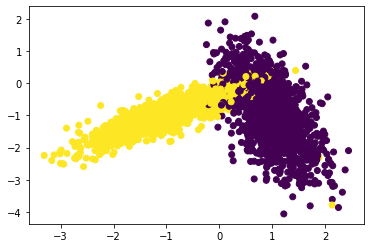

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    
    '''
    x_train    : its numpy array of shape, (n,d)
    y_train    : its numpy array of shape, (n,) or (n,1)
    classifier : its typically KNeighborsClassifier()
    param_range: its a tuple like (a,b) a < b
    folds      : an integer, represents number of folds we need to devide the data and test our model
    '''

    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store
    #them as "params" ten_value_param_range = sorted(np.random.randint(param_range[0],param_range[1], 10))
    
    ten_value_param_range = sorted(random.sample(range(param_range[0],param_range[1]), 10))
    params = {'n_neighbors': ten_value_param_range }
    
    #2.devide numbers ranging from  0 to len(X_train) into groups k folds
    
    '''
    https://stackoverflow.com/a/43106405
    
    import numpy as np
    xy = np.array_split(range(100), 3)
    for i in xy:
        print(i)

    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
    [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
    [67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
    '''
    x_train_split = np.array_split(x_train, folds)
    y_train_split = np.array_split(y_train, folds)

    x_train_folds = []
    y_train_folds = []
    for xt,yt in zip(x_train_split,y_train_split):
        x_train_folds.append(xt)
        y_train_folds.append(yt)
#     print(len(x_train_split)) # ==> folds
    
    # 3.for each hyperparameter that we generate values
    
    train_scores = []
    test_scores  = []

    for k in tqdm(params['n_neighbors']):
        train_scores_folds = []
        test_scores_folds  = []

        '''
        https://stackoverflow.com/a/61819104

        x_train_fold_input = [[5],[7],[9]]
        for xy in range(len(x_train_fold_input)):
            print('CV data    : ', x_train_fold_input[xy])
            print('Train data : ', x_train_fold_input[0:xy] + x_train_fold_input[xy+1:])
            print('\n')
            
        CV data    :  [5]
        Train data :  [[7], [9]]


        CV data    :  [7]
        Train data :  [[5], [9]]


        CV data    :  [9]
        Train data :  [[5], [7]]
        '''
        
        for index in range(len(x_train_folds)):
#         K-Fold splitting
            x_fold_train = []
            y_fold_train = []
            
            x_train_folds_cv = x_train_folds[index]
            x_train_folds_train = x_train_folds[0:index] + x_train_folds[index+1:]
            y_train_folds_cv = y_train_folds[index]
            y_train_folds_train = y_train_folds[0:index] + y_train_folds[index+1:]
            
#             print(len(x_train_folds_train)) # ==> folds-1, means [[...], [...]] : if fold ==3
#                                                     But we need [.......]
            
            if len(x_train_folds_train) == folds-1 :
                for each in x_train_folds_train:
                    x_fold_train.extend(each)
            if len(y_train_folds_train) == folds-1:
                for each in y_train_folds_train:
                    y_fold_train.extend(each)
#             print(len(x_fold_train)) # ==> [...........]
            
#         Applying Classifier : Assignment_4_Reference
            classifier.n_neighbors = k
            classifier.fit(x_fold_train,y_fold_train)
            
#         Train score Computation
            Y_predicted = classifier.predict(x_fold_train)
            train_scores_folds.append(accuracy_score(y_fold_train, Y_predicted))
        
#         Test score Computation
            Y_predicted = classifier.predict(x_train_folds_cv)
            test_scores_folds.append(accuracy_score(y_train_folds_cv, Y_predicted))
    
        train_scores.append(np.mean(np.array(train_scores_folds)))
        test_scores.append(np.mean(np.array(test_scores_folds)))
        
    return train_scores,test_scores, params

  0%|          | 0/10 [00:00<?, ?it/s]

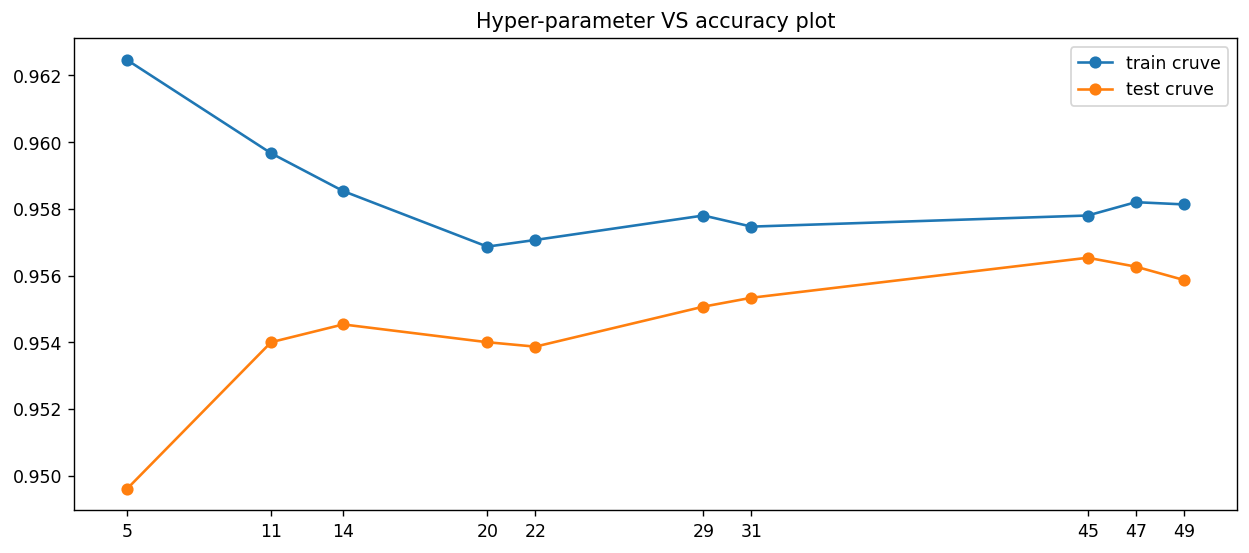

In [4]:
#https://colab.research.google.com/drive/13NoPSgtq_OEqFiUbAmzjVsbMWWUayofG : Assignment_4_Reference

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

classifier = KNeighborsClassifier()

param_range = (1, 50)
folds = 3

train_scores,cv_scores, params = RandomSearchCV(X_train,y_train,classifier, param_range, folds)

plt.figure(figsize = (12,5), dpi =125)
plt.plot(params['n_neighbors'],train_scores, 'o-', label='train cruve')
plt.plot(params['n_neighbors'],cv_scores, 'o-', label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xticks(params['n_neighbors'])
plt.legend()
plt.show()

In [5]:
#https://colab.research.google.com/drive/13NoPSgtq_OEqFiUbAmzjVsbMWWUayofG : Assignment_4_Reference

def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

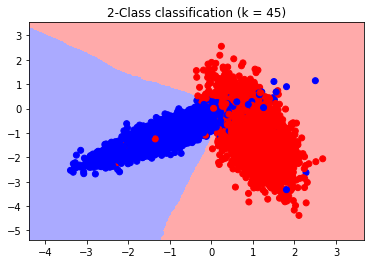

In [6]:
#https://colab.research.google.com/drive/13NoPSgtq_OEqFiUbAmzjVsbMWWUayofG : Assignment_4_Reference

from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)